In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input/hackerearth/dataset"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
train = pd.read_csv('../input/hackerearth/dataset/train.csv')
test = pd.read_csv('../input/hackerearth/dataset/test.csv')
sub = pd.read_csv('../input/hackerearth/dataset/sample_submission.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# getting the shapes of the datasets
print("Shape of Train :", train.shape)
print("Shape of Test :", test.shape)
print("Shape of submission :", sub.shape)

Shape of Train : (418067, 28)
Shape of Test : (104516, 27)
Shape of submission : (9, 2)


In [4]:
Case_no_train = train['CASE_NO']
Case_no_test = test['CASE_NO']
data = pd.concat([train, test], axis = 0, ignore_index=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [6]:
train['CASE_STATUS'].unique()

array(['CERTIFIEDWITHDRAWN', 'WITHDRAWN', 'CERTIFIED', 'DENIED'],
      dtype=object)

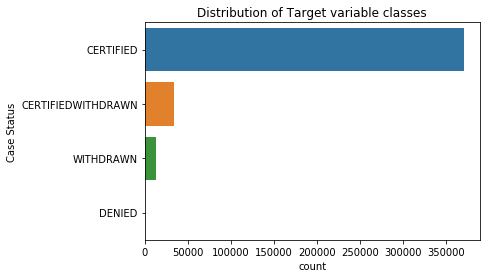

In [7]:
g = sns.countplot(y=train['CASE_STATUS'], order=[
    'CERTIFIED', 'CERTIFIEDWITHDRAWN', 'WITHDRAWN', 'DENIED'])
g.set_ylabel('Case Status')
g.set_title('Distribution of Target variable classes')
plt.show()

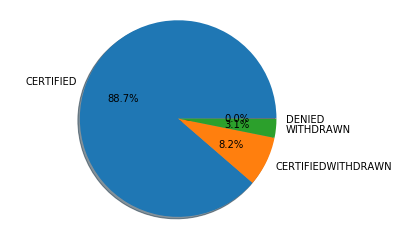

In [8]:
labels = ['CERTIFIED', 'CERTIFIEDWITHDRAWN', 'WITHDRAWN', 'DENIED']
sizes=[data['CASE_STATUS'].value_counts()[0], data['CASE_STATUS'].value_counts()[1], data['CASE_STATUS'].value_counts()[2], data['CASE_STATUS'].value_counts()[3]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [9]:
train.describe()

,CASE_NO,CASE_SUBMITTED_DAY,CASE_SUBMITTED_MONTH,CASE_SUBMITTED_YEAR,DECISION_DAY,DECISION_MONTH,DECISION_YEAR,NAICS_CODE,TOTAL_WORKERS,PREVAILING_WAGE,PW_SOURCE_YEAR,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO
count,4.180670e+05,414068.000000,418067.000000,418067.000000,418067.000000,418067.000000,418067.000000,414068.000000,418067.000000,414068.000000,418065.000000,4.180670e+05,4.180670e+05
mean,5.497963e+06,15.317462,4.381781,2016.691155,16.567713,4.485133,2016.783303,442264.396227,1.936075,70746.585526,2016.041977,8.048788e+04,2.375929e+04
std,2.596205e+06,8.106625,3.534558,0.570987,8.491076,3.534325,0.411995,198109.240571,5.190448,31369.546393,3.163978,4.143085e+04,5.157029e+04
min,1.000006e+06,1.000000,1.000000,2011.000000,1.000000,1.000000,2016.000000,31.000000,0.000000,0.000000,1.000000,7.260000e+00,0.000000e+00
25%,3.253296e+06,9.000000,2.000000,2016.000000,9.000000,3.000000,2017.000000,452111.000000,1.000000,55744.000000,2016.000000,6.140200e+04,0.000000e+00
50%,5.495191e+06,15.000000,3.000000,2017.000000,17.000000,3.000000,2017.000000,541511.000000,1.000000,67891.000000,2016.000000,7.388200e+04,0.000000e+00
75%,7.750158e+06,22.000000,3.000000,2017.000000,23.000000,4.000000,2017.000000,541511.000000,1.000000,85500.000000,2016.000000,9.563050e+04,0.000000e+00
max,9.999999e+06,31.000000,12.000000,2017.000000,31.000000,12.000000,2017.000000,999990.000000,150.000000,414007.000000,2017.000000,1.350000e+06,1.540000e+06


Displaying the percentage of missing values in each column

In [10]:
display_all(data.isnull().sum().sort_index()/len(data))

CASE_NO                  0.000000
CASE_STATUS              0.199999
CASE_SUBMITTED_DAY       0.007652
CASE_SUBMITTED_MONTH     0.000000
CASE_SUBMITTED_YEAR      0.000000
DECISION_DAY             0.000000
DECISION_MONTH           0.000000
DECISION_YEAR            0.000000
EMPLOYER_COUNTRY         0.000000
EMPLOYER_NAME            0.000071
EMPLOYER_STATE           0.000019
FULL_TIME_POSITION       0.000002
H+AC0-1B_DEPENDENT       0.806789
H-1B_DEPENDENT           0.212119
NAICS_CODE               0.007652
PREVAILING_WAGE          0.007652
PW_SOURCE                0.000019
PW_SOURCE_OTHER          0.000000
PW_SOURCE_YEAR           0.000017
PW_UNIT_OF_PAY           0.000017
SOC_NAME                 0.000000
TOTAL_WORKERS            0.000000
VISA_CLASS               0.000000
WAGE_RATE_OF_PAY_FROM    0.000000
WAGE_RATE_OF_PAY_TO      0.000000
WAGE_UNIT_OF_PAY         0.000004
WILLFUL_VIOLATOR         0.018910
WORKSITE_POSTAL_CODE     0.000000
WORKSITE_STATE           0.000000
dtype: float64

In [11]:
data.isna().sum()

CASE_NO                       0
CASE_STATUS              104516
CASE_SUBMITTED_DAY         3999
CASE_SUBMITTED_MONTH          0
CASE_SUBMITTED_YEAR           0
DECISION_DAY                  0
DECISION_MONTH                0
DECISION_YEAR                 0
EMPLOYER_COUNTRY              0
EMPLOYER_NAME                37
EMPLOYER_STATE               10
FULL_TIME_POSITION            1
H+AC0-1B_DEPENDENT       421614
H-1B_DEPENDENT           110850
NAICS_CODE                 3999
PREVAILING_WAGE            3999
PW_SOURCE                    10
PW_SOURCE_OTHER               0
PW_SOURCE_YEAR                9
PW_UNIT_OF_PAY                9
SOC_NAME                      0
TOTAL_WORKERS                 0
VISA_CLASS                    0
WAGE_RATE_OF_PAY_FROM         0
WAGE_RATE_OF_PAY_TO           0
WAGE_UNIT_OF_PAY              2
WILLFUL_VIOLATOR           9882
WORKSITE_POSTAL_CODE          0
WORKSITE_STATE                0
dtype: int64

Removing the "H+AC0-1B_DEPENDENT" feature as it contains more than 80% of missing values, creating a new feature "H+AC0-1B_DEPENDENT_missing_flag"(1 = is missing, 0 = not missing)

In [12]:
data['H+AC0-1B_DEPENDENT_missing_flag']=0
data['H+AC0-1B_DEPENDENT'].fillna(1, inplace=True)
data['H+AC0-1B_DEPENDENT_missing_flag'][data['H+AC0-1B_DEPENDENT']==1]=1
data.drop('H+AC0-1B_DEPENDENT', inplace=True, axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Filling the Missing values of categorical variables with Mode(most occuring value).

In [13]:
data['FULL_TIME_POSITION'].fillna(data['FULL_TIME_POSITION'].mode()[0], inplace=True)
data['EMPLOYER_NAME'].fillna(data['EMPLOYER_NAME'].mode()[0], inplace=True)
data['EMPLOYER_STATE'].fillna(data['EMPLOYER_STATE'].mode()[0], inplace=True)
data['CASE_SUBMITTED_DAY'].fillna(data['CASE_SUBMITTED_DAY'].mode()[0], inplace=True)
data['PW_SOURCE'].fillna(data['PW_SOURCE'].mode()[0], inplace=True)
data['PW_SOURCE_YEAR'].fillna(data['PW_SOURCE_YEAR'].mode()[0], inplace=True)
data['PW_UNIT_OF_PAY'].fillna(data['PW_UNIT_OF_PAY'].mode()[0], inplace=True)
data['WAGE_UNIT_OF_PAY'].fillna(data['WAGE_UNIT_OF_PAY'].mode()[0], inplace=True)


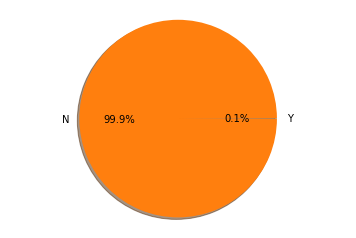

In [14]:
labels = ['Y', 'N']
sizes=[data['WILLFUL_VIOLATOR'].value_counts()[1], data['WILLFUL_VIOLATOR'].value_counts()[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

As there is highly imbalanced class here, it is better to drop this variable as it will make the model more bias towards the majority class. 

In [15]:
data.drop('WILLFUL_VIOLATOR', axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(

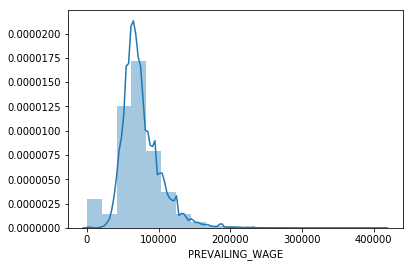

In [16]:
import seaborn as sns
sns.distplot(data['PREVAILING_WAGE'], bins=20, kde=True)

Most of the petitions have a wage in the range between 40k and 80k US Dollars. There are certain petitions with wages of more than $200k, and some with 0 dollars. Since there are very few such cases, they should be treated as outliers by capping them at the 2nd and 98th percentile

In [17]:
#Removing Outliers by 2nd and 98th quartile value
data.loc[data.PREVAILING_WAGE < 26.38, 'PREVAILING_WAGE']= 26.38
data.loc[data['PREVAILING_WAGE'] > 147222, 'PREVAILING_WAGE']= 147222
data['PREVAILING_WAGE'].describe()

count    518584.000000
mean      71185.049054
std       30004.704009
min          26.380000
25%       55910.000000
50%       68827.000000
75%       87194.000000
max      147222.000000
Name: PREVAILING_WAGE, dtype: float64

Grouping the Prevaling_Wage according to PW_UNIT_OF_PAY and calculating mean and median of each group.

In [18]:
df = data.groupby('PW_UNIT_OF_PAY')['PREVAILING_WAGE'].median()
df_mean= data.groupby('PW_UNIT_OF_PAY')['PREVAILING_WAGE'].mean()

In [19]:
data['PREVAILING_WAGE'].fillna('nan', inplace=True)

Filling the missing values with the above calculated median according to PW_UNIT_OF_PAY i.e hour, week, month and year.

In [20]:
data.loc[(data.PREVAILING_WAGE =='nan') & (data.PW_UNIT_OF_PAY == 'Hour'), 'PREVAILING_WAGE']=df.Hour
data.loc[(data.PREVAILING_WAGE =='nan') & (data.PW_UNIT_OF_PAY == 'Month'), 'PREVAILING_WAGE']=df.Month
data.loc[(data.PREVAILING_WAGE =='nan') & (data.PW_UNIT_OF_PAY == 'Year'), 'PREVAILING_WAGE']=df.Year
data.loc[(data.PREVAILING_WAGE =='nan') & (data.PW_UNIT_OF_PAY == 'Week'), 'PREVAILING_WAGE']=df.Week
data.loc[(data.PREVAILING_WAGE =='nan') & (data.PW_UNIT_OF_PAY == 'Bi+AC0-Weekly'), 'PREVAILING_WAGE']=2436.00
data['PREVAILING_WAGE']=data['PREVAILING_WAGE'].astype(float)

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


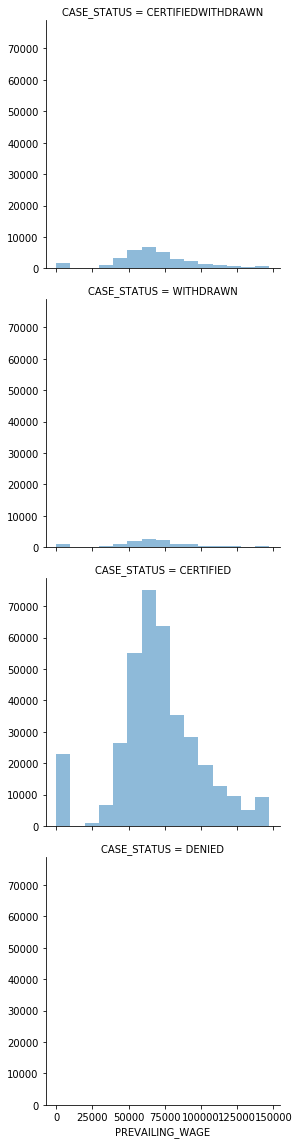

In [21]:
g = sns.FacetGrid(data, row='CASE_STATUS', size=4)
g.map(plt.hist, 'PREVAILING_WAGE', alpha=0.5, bins=15)
g.add_legend()
plt.show()

Dropping the rows in which NAICS_CODE is null

In [22]:
data.dropna(subset=['NAICS_CODE'], inplace=True)
print(data.shape)

(518584, 28)


As H-1B_DEPENDENT feature is dependent on many factors, therefore assigning the null values as a new category to prevent any ambuiguity

In [23]:
data['H-1B_DEPENDENT'].fillna("Not Specified", inplace=True)

In [24]:
data['H-1B_DEPENDENT'].value_counts()

N                257010
Y                150869
Not Specified    110705
Name: H-1B_DEPENDENT, dtype: int64

In [25]:
def unique_info(columns):
    for i in columns:
        print("Unique info for feature {}: ".format(i))
        print(data[i].nunique())
        print(data[i].unique())
        print("\n")

A new feature called NEW_EMPLOYER is created: If the employer name contains the string 'University', for instance if a US university is filing a visa petition, then it has more chances of approval for the employee. Dropping the feature EMPLOYER_NAME as it has too many categories.

In [26]:
# flag =1 is a university, 0= non university
data['NEW_EMPLOYER'] = np.nan
data['EMPLOYER_NAME'] = data['EMPLOYER_NAME'].str.lower()
data.NEW_EMPLOYER[data['EMPLOYER_NAME'].str.contains('university')] = 1
data['NEW_EMPLOYER']= data.NEW_EMPLOYER.replace(np.nan, 0, regex=True)
data.drop('EMPLOYER_NAME', axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Converting the 'CASE_SUBMITTED_DAY', 'CASE_SUBMITTED_MONTH', 'CASE_SUBMITTED_YEAR', 'DECISION_MONTH', 'DECISION_YEAR', 'DECISION_DAY' to timestamp type so as to extract the time ellapsed between case submitted and decision day.  

In [27]:
df_case_sub = pd.DataFrame({'year': data['CASE_SUBMITTED_YEAR'],
                       'month': data['CASE_SUBMITTED_MONTH'],
                       'day': data['CASE_SUBMITTED_DAY']})
df_case_sub=pd.to_datetime(df_case_sub)
df_desc_day = pd.DataFrame({'year': data['DECISION_YEAR'],
                       'month': data['DECISION_MONTH'],
                       'day': data['DECISION_DAY']})
df_desc_day=pd.to_datetime(df_desc_day)


In [28]:
data['Case_sub_time'] = df_case_sub
data['Desc_day_time'] = df_desc_day
data.drop(['DECISION_DAY', 'CASE_SUBMITTED_DAY', 'CASE_SUBMITTED_MONTH', 'CASE_SUBMITTED_YEAR', 'DECISION_MONTH', 
          'DECISION_YEAR'], axis=1, inplace=True)
data.columns

Index(['CASE_NO', 'CASE_STATUS', 'EMPLOYER_COUNTRY', 'EMPLOYER_STATE',
       'FULL_TIME_POSITION', 'H-1B_DEPENDENT', 'NAICS_CODE', 'PREVAILING_WAGE',
       'PW_SOURCE', 'PW_SOURCE_OTHER', 'PW_SOURCE_YEAR', 'PW_UNIT_OF_PAY',
       'SOC_NAME', 'TOTAL_WORKERS', 'VISA_CLASS', 'WAGE_RATE_OF_PAY_FROM',
       'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY', 'WORKSITE_POSTAL_CODE',
       'WORKSITE_STATE', 'H+AC0-1B_DEPENDENT_missing_flag', 'NEW_EMPLOYER',
       'Case_sub_time', 'Desc_day_time'],
      dtype='object')

In [29]:
data['Time_Elapsed'] = data['Desc_day_time']-data['Case_sub_time']
data['Time_Elapsed']=data['Time_Elapsed']/np.timedelta64(1,'D')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


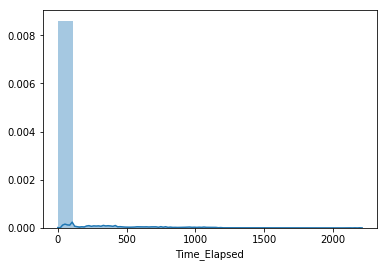

In [30]:
import seaborn as sns
sns.distplot(data['Time_Elapsed'], bins=20, kde=True)

Dropping the noisy features

In [31]:
data.drop(['Case_sub_time', 'Desc_day_time', 'WORKSITE_POSTAL_CODE'], axis=1, inplace=True)

In [32]:
data['WAGE_UNIT_OF_PAY'][data['WAGE_UNIT_OF_PAY']=='Bi+AC0-Weekly']='Week'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
data.dtypes

CASE_NO                              int64
CASE_STATUS                         object
EMPLOYER_COUNTRY                    object
EMPLOYER_STATE                      object
FULL_TIME_POSITION                  object
H-1B_DEPENDENT                      object
NAICS_CODE                         float64
PREVAILING_WAGE                    float64
PW_SOURCE                           object
PW_SOURCE_OTHER                     object
PW_SOURCE_YEAR                     float64
PW_UNIT_OF_PAY                      object
SOC_NAME                            object
TOTAL_WORKERS                        int64
VISA_CLASS                          object
WAGE_RATE_OF_PAY_FROM              float64
WAGE_RATE_OF_PAY_TO                float64
WAGE_UNIT_OF_PAY                    object
WORKSITE_STATE                      object
H+AC0-1B_DEPENDENT_missing_flag      int64
NEW_EMPLOYER                       float64
Time_Elapsed                       float64
dtype: object

In [34]:
data['WAGE_RATE_diff']=data['WAGE_RATE_OF_PAY_FROM']-data['WAGE_RATE_OF_PAY_TO']
data['WAGE_RATE_diff'].describe()

count    5.185840e+05
mean     5.769639e+04
std      5.937693e+04
min     -2.000000e+06
25%      3.560000e+01
50%      6.618600e+04
75%      8.750000e+04
max      1.350000e+06
Name: WAGE_RATE_diff, dtype: float64

In [35]:
data['PW_SOURCE_OTHER'].nunique()

192

 For feature PW_SOURCE_OTHER there are 193 unique values which are grouped together in order to reduce the unique features. for example all strings containing 'CBA'or'COLLECTIVE BARGAINING AGREEMENT' are grouped as one category called 'CBA'. The categories which has value counts less than 50 are grouped under 'Other' category.
 Moreover, 'PW_Source' and PW_SOURCE_OTHER features are combined into one feature based on 'Other' category.

In [36]:
data['PW_SOURCE_OTHER_grouped'] = np.nan
data['PW_SOURCE_OTHER'] = data['PW_SOURCE_OTHER'].str.upper()
data.PW_SOURCE_OTHER_grouped[data['PW_SOURCE_OTHER'].str.contains('CBA','COLLECTIVE BARGAINING AGREEMENT')] = 'CBA'
data.PW_SOURCE_OTHER_grouped[data['PW_SOURCE_OTHER'].str.contains('RADFORD GLOBAL')] = 'RADFORD GLOBAL SURVEY'
data.PW_SOURCE_OTHER_grouped[data['PW_SOURCE_OTHER'].str.contains('BUREAU OF LABOR STATISTICS', 'OCCUPATIONAL EMPLOYMENT STATISTICS' )] = 'OES'
data.PW_SOURCE_OTHER_grouped[data['PW_SOURCE_OTHER'].str.contains('OES')] = 'OES'
data.PW_SOURCE_OTHER_grouped[data['PW_SOURCE_OTHER'].str.contains('OFLC' )] = 'OFLC'
data.PW_SOURCE_OTHER_grouped[data['PW_SOURCE_OTHER'].str.contains('WATSON')] = 'WATSON SURVEY'
data.PW_SOURCE_OTHER_grouped[data['PW_SOURCE_OTHER'].str.contains('MERCER')] = 'MERCER BENCHMARK'
data.PW_SOURCE_OTHER_grouped[data['PW_SOURCE_OTHER'].str.contains('COMPENSATION SURVEY')] = 'COMPENSATION SURVEY'
data.PW_SOURCE_OTHER_grouped[data['PW_SOURCE_OTHER'].str.contains('SCHOOL', 'UNIVERSITY')] = 'EDUCATIONAL'


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages

In [37]:
data['PW_SOURCE_OTHER_grouped'].fillna('OTHER', inplace=True)

In [38]:
data['PW_SOURCE_OTHER_grouped'].value_counts()

OFLC                     489048
RADFORD GLOBAL SURVEY     11723
OTHER                     11182
WATSON SURVEY              4218
MERCER BENCHMARK           1416
COMPENSATION SURVEY         481
OES                         358
CBA                         126
EDUCATIONAL                  32
Name: PW_SOURCE_OTHER_grouped, dtype: int64

'PW_Source' and PW_SOURCE_OTHER features are combined into one feature based on 'Other' category.

In [39]:
data.loc[(data.PW_SOURCE =='Other'), 'PW_SOURCE']=data['PW_SOURCE_OTHER_grouped']
data.drop(['PW_SOURCE_OTHER_grouped', 'PW_SOURCE_OTHER'], axis=1, inplace=True)

In [40]:
data['PW_SOURCE'].value_counts()

OES                      418297
OFLC                      73710
RADFORD GLOBAL SURVEY     11693
OTHER                      5525
WATSON SURVEY              4198
CBA                        3234
MERCER BENCHMARK           1406
COMPENSATION SURVEY         480
EDUCATIONAL                  22
DBA                          11
SCA                           8
Name: PW_SOURCE, dtype: int64

In [41]:
data.columns

Index(['CASE_NO', 'CASE_STATUS', 'EMPLOYER_COUNTRY', 'EMPLOYER_STATE',
       'FULL_TIME_POSITION', 'H-1B_DEPENDENT', 'NAICS_CODE', 'PREVAILING_WAGE',
       'PW_SOURCE', 'PW_SOURCE_YEAR', 'PW_UNIT_OF_PAY', 'SOC_NAME',
       'TOTAL_WORKERS', 'VISA_CLASS', 'WAGE_RATE_OF_PAY_FROM',
       'WAGE_RATE_OF_PAY_TO', 'WAGE_UNIT_OF_PAY', 'WORKSITE_STATE',
       'H+AC0-1B_DEPENDENT_missing_flag', 'NEW_EMPLOYER', 'Time_Elapsed',
       'WAGE_RATE_diff'],
      dtype='object')

In [42]:
data['EMPLOYER_COUNTRY'].value_counts()

UNITED STATES OF AMERICA    518574
CANADA                           7
AUSTRALIA                        2
CHINA                            1
Name: EMPLOYER_COUNTRY, dtype: int64

Dropping the feature EMPLOYER_COUNTRY as it is more biased towards majority class UNITED STATES OF AMERICA

In [43]:
data.drop('EMPLOYER_COUNTRY', axis=1, inplace=True)

In [44]:
data['PW_SOURCE_YEAR'].value_counts()

2016.0    421605
2017.0     74232
2015.0     13479
2014.0      6300
2013.0      2618
2011.0       204
2012.0        80
2009.0        21
2010.0        14
2008.0        13
2007.0        12
2001.0         3
2000.0         1
1998.0         1
1.0            1
Name: PW_SOURCE_YEAR, dtype: int64

In [45]:
data.dtypes

CASE_NO                              int64
CASE_STATUS                         object
EMPLOYER_STATE                      object
FULL_TIME_POSITION                  object
H-1B_DEPENDENT                      object
NAICS_CODE                         float64
PREVAILING_WAGE                    float64
PW_SOURCE                           object
PW_SOURCE_YEAR                     float64
PW_UNIT_OF_PAY                      object
SOC_NAME                            object
TOTAL_WORKERS                        int64
VISA_CLASS                          object
WAGE_RATE_OF_PAY_FROM              float64
WAGE_RATE_OF_PAY_TO                float64
WAGE_UNIT_OF_PAY                    object
WORKSITE_STATE                      object
H+AC0-1B_DEPENDENT_missing_flag      int64
NEW_EMPLOYER                       float64
Time_Elapsed                       float64
WAGE_RATE_diff                     float64
dtype: object

In [46]:
df1=data.copy()

![](http://)Converting the datatypes to category for all the categorical features.

In [47]:
data[['CASE_STATUS','EMPLOYER_STATE','H-1B_DEPENDENT','NAICS_CODE','PW_SOURCE',
      'FULL_TIME_POSITION','PW_SOURCE_YEAR','PW_UNIT_OF_PAY',
      'SOC_NAME','VISA_CLASS', 'NEW_EMPLOYER','WAGE_UNIT_OF_PAY','WORKSITE_STATE', 
      'H+AC0-1B_DEPENDENT_missing_flag']] = data[['CASE_STATUS','EMPLOYER_STATE','H-1B_DEPENDENT','NAICS_CODE','PW_SOURCE',
                                                  'FULL_TIME_POSITION','PW_SOURCE_YEAR','PW_UNIT_OF_PAY',
                                                  'SOC_NAME','VISA_CLASS', 'NEW_EMPLOYER','WAGE_UNIT_OF_PAY','WORKSITE_STATE', 
                                                  'H+AC0-1B_DEPENDENT_missing_flag']].apply(lambda x: x.astype('category'))


In [48]:
data['CASE_STATUS'].value_counts()

CERTIFIED             367259
CERTIFIEDWITHDRAWN     33771
WITHDRAWN              12891
DENIED                   147
Name: CASE_STATUS, dtype: int64

In [49]:
case_no_test=data['CASE_NO'][data['CASE_STATUS'] == 'nan']
data.drop('CASE_NO', axis=1, inplace=True)

In [50]:
data['CASE_STATUS']=data['CASE_STATUS'].astype(str)

In [51]:
data['CASE_STATUS'].value_counts()

CERTIFIED             367259
nan                   104516
CERTIFIEDWITHDRAWN     33771
WITHDRAWN              12891
DENIED                   147
Name: CASE_STATUS, dtype: int64

In [52]:
#split into original test and train
#data['CASE_STATUS'].fillna(2, inplace = True)
test_df = data[data['CASE_STATUS'] == 'nan']
train_df = data[data['CASE_STATUS'] != 'nan']
test_df.drop(['CASE_STATUS'], axis = 1, inplace = True)
y_train = train_df['CASE_STATUS']
train_df.drop(['CASE_STATUS'], axis = 1, inplace = True)
print("train shape" + str(train_df.shape))
print("test shape"+str(test_df.shape))

train shape(414068, 19)
test shape(104516, 19)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [53]:
y_train.value_counts()

CERTIFIED             367259
CERTIFIEDWITHDRAWN     33771
WITHDRAWN              12891
DENIED                   147
Name: CASE_STATUS, dtype: int64

In [54]:
y_train=y_train.astype('category')


In [55]:
!pip install catboost

In [56]:
categorical = ['EMPLOYER_STATE','H-1B_DEPENDENT','NAICS_CODE','PW_SOURCE',
      'FULL_TIME_POSITION','PW_SOURCE_YEAR','PW_UNIT_OF_PAY',
      'SOC_NAME','VISA_CLASS', 'NEW_EMPLOYER','WAGE_UNIT_OF_PAY','WORKSITE_STATE', 
      'H+AC0-1B_DEPENDENT_missing_flag']

In [57]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols, query_cols, sorter=sidx)]
categorical_features_indices = column_index(train_df, categorical)

In [58]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_label, y_valid = train_test_split(train_df, y_train, test_size = 0.2, stratify=y_train,random_state = 0)

# checking the shapes
print(x_train.shape)
print(y_label.shape)
print(x_valid.shape)
print(y_valid.shape)

(331254, 19)
(331254,)
(82814, 19)
(82814,)


In [59]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score, cross_val_predict, validation_curve 
from catboost import CatBoostClassifier

Building the Model with CatBoostClassifier as it can handle categorical variables very well.

In [60]:
model = CatBoostClassifier(iterations=200,learning_rate=0.2,
                           loss_function='MultiClass',
                           eval_metric='Accuracy',
                           task_type='GPU')
  
model.fit(x_train, y_label,
          cat_features=categorical_features_indices,
          eval_set=(x_valid, y_valid),
          verbose=10);

0:	learn: 0.9879005	test: 0.9886251	best: 0.9886251 (0)	total: 17.2ms	remaining: 3.41s
10:	learn: 0.9879126	test: 0.9886855	best: 0.9886855 (1)	total: 171ms	remaining: 2.93s
20:	learn: 0.9880001	test: 0.9887338	best: 0.9887579 (19)	total: 320ms	remaining: 2.72s
30:	learn: 0.9880605	test: 0.9885164	best: 0.9887579 (19)	total: 464ms	remaining: 2.53s
40:	learn: 0.9880847	test: 0.9885527	best: 0.9887579 (19)	total: 606ms	remaining: 2.35s
50:	learn: 0.9881028	test: 0.9885406	best: 0.9887579 (19)	total: 748ms	remaining: 2.18s
60:	learn: 0.9881088	test: 0.9885768	best: 0.9887579 (19)	total: 891ms	remaining: 2.03s
70:	learn: 0.9881360	test: 0.9886130	best: 0.9887579 (19)	total: 1.03s	remaining: 1.88s
80:	learn: 0.9881571	test: 0.9887459	best: 0.9887700 (78)	total: 1.18s	remaining: 1.73s
90:	learn: 0.9881873	test: 0.9888304	best: 0.9888304 (86)	total: 1.32s	remaining: 1.58s
100:	learn: 0.9882054	test: 0.9888183	best: 0.9888545 (91)	total: 1.46s	remaining: 1.43s
110:	learn: 0.9882507	test: 0.988

In [61]:
y_pred=model.predict(x_valid)

Checking the Classification report

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[73382    70     0     0]
 [  135  6615     0     4]
 [   30     0     0     0]
 [  333   339     0  1906]]


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                    precision    recall  f1-score   support

         CERTIFIED       0.99      1.00      1.00     73452
CERTIFIEDWITHDRAWN       0.94      0.98      0.96      6754
            DENIED       0.00      0.00      0.00        30
         WITHDRAWN       1.00      0.74      0.85      2578

         micro avg       0.99      0.99      0.99     82814
         macro avg       0.73      0.68      0.70     82814
      weighted avg       0.99      0.99      0.99     82814



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Ploting the feature importance graph

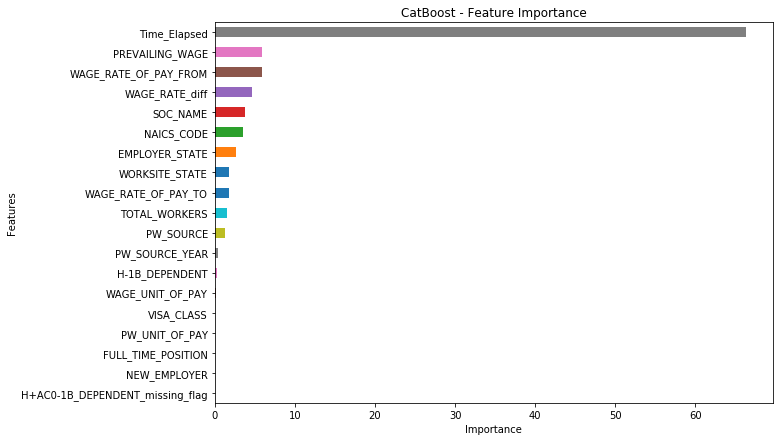

In [63]:
import matplotlib.pyplot as plt
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': train_df.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=True)
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');


In [64]:
import pandas as pd
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = train_df.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)
feature_importances.head

<bound method NDFrame.head of                                  importance
Time_Elapsed                      66.366391
PREVAILING_WAGE                    5.893847
WAGE_RATE_OF_PAY_FROM              5.881838
WAGE_RATE_diff                     4.598662
SOC_NAME                           3.757639
NAICS_CODE                         3.516480
EMPLOYER_STATE                     2.651052
WORKSITE_STATE                     1.801212
WAGE_RATE_OF_PAY_TO                1.770482
TOTAL_WORKERS                      1.478795
PW_SOURCE                          1.273513
PW_SOURCE_YEAR                     0.340435
H-1B_DEPENDENT                     0.267593
WAGE_UNIT_OF_PAY                   0.193066
VISA_CLASS                         0.080631
PW_UNIT_OF_PAY                     0.054760
FULL_TIME_POSITION                 0.053177
NEW_EMPLOYER                       0.020427
H+AC0-1B_DEPENDENT_missing_flag    0.000000>

Prediction on the test set.

In [65]:
k=model.predict(test_df)

In [66]:
kpd=pd.DataFrame(k, columns=['CASE_STATUS'])
kpd1=pd.DataFrame(test['CASE_NO'], columns=['CASE_NO'])
sub = pd.concat([kpd1, kpd], axis = 1, ignore_index=True)
sub.columns=['CASE_NO', 'CASE_STATUS']
sub.head()

,CASE_NO,CASE_STATUS
0,2436697,CERTIFIED
1,2518345,CERTIFIED
2,6414652,CERTIFIED
3,2785608,CERTIFIED
4,7037786,CERTIFIED


In [67]:
sub.to_csv("submission_ZS-ML-3-deekshaAgg.csv",index=False)